###### <center> Topic Modeling </center>

- This lecture is created based on 
    * Blei. D. (2012), "Probabilistic Topic Models", http://www.cs.columbia.edu/~blei/talks/Blei_ICML_2012.pdf
    * http://videolectures.net/mlss09uk_blei_tm/

## 1. Introduction

- Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
  - Discover the hidden themes that pervade the collection.
  - Annotate the documents according to those themes.
  - Use annotations to organize, summarize, and search the texts.
- Formal Definition
<img src='topic_modeling.png' width='70%'>
  
  - **Topics**: each topic is a **distribution over words** 
    - e.g. for topic "Gentics", $p('gene'~|~'Genetics')~=~0.04$, $p('dna'~|~'Genetics')=0.02$
    - $K$ topics $\theta_1, \theta_2, ..., \theta_K$, $N$ words $w_1, w_2, ..., w_N$ in corpus, we need to know  $p(w_i|\theta_j)$ for $i \in N$ and $j\in K$
  - **Document ($d$)**: a **mixture of topics**
    - e.g. for above document $d$, $p('Genetics'~|~d)=0.5$, $p('LifeScience'~|~d)=0.15$, ...
    - In general, given document $d$ and topic $\theta_j$, we need to know $p(\theta_j~|~d)$, i.e. **topic proportion**


## 2. Statistical Language Model
- Definition: given a corpus with $M$ documents, $N$ words, $K$ topics, a model contains the following probabilities:
  - topic probability distribution in corpus: <br>$p(\theta_j)$ for $j \in K$, $\sum_{j\in K}{p(\theta_j)}=1$
  - topic distribution per document $d$ (document assignment): <br>$p(\theta_j~|~d)$, $\sum_{j\in K}{p(\theta_j~|~d)}=1$ 
  - word distribution per topic (why do we need to know it?): <br> $p(w_i~|~\theta_j)$ for $i \in N$ and $j\in K$, $\sum_{i\in N}{p(w_i~|~\theta_j)}=1$ 
  <img src='language_model.png' width='30%'>

## 3. How to estimate these probabilities?
### 3.1. Supervised learning - Naive Bayes
- Topic probability: 
$$ p(\theta_j) = \frac{\text{documents in topic } j + \alpha_1} {\text{total documents}+\alpha_2}$$  
- Word distribution per topic: 
$$ p(w_i~|~\theta_j)= \frac{\text{count of word } w_i \text{ in topic } j + \alpha_1} {\text{total word count in documents of topic }j + \alpha_2}$$  
- Topic distribution per document: 
$$ \begin{array}{l}
 p(\theta_j~|~d) = \frac{p(d|\theta_j) * p(\theta_j)}{p(d)} \text{         # Bayesian rule}\\
 C_{MAP} = \underset{\theta}{\operatorname{argmax}}{p(d~|~\theta)*p(\theta)} \text{         # maximum a posteriori}\\
    C_{MAP} = \underset{\theta}{\operatorname{argmax}}{p(w_1,w_2, ...,w_N~|~\theta)*p(\theta)} \\
    C_{MAP} = \underset{\theta}{\operatorname{argmax}}({\prod_{i \in N} {p(w_i~|~\theta)})*p(\theta)}  \textit{ # independence assumption}
  \end{array}$$  
- Naive Bayes model is also a kind of language model

### 3.2. Generative Model for Unsupervised learning 
- We don't have labeled data; we only observe the documents
- We **cannot** estimate $p(\theta_j)$ and $p(w_i~|~\theta_j)$ as above
- Instead, we use a **generative model** that describes how a document $d$ was created
  1. decide on document length $N$, e.g. 100 words
  2. decide on topic mixture (i.e. $p(\theta_j~|~d)$), e.g. 70% about genetics and 30% about life science, ...
  3. for each of the N words,
     - 3.1. choose a topic from the topic mixture, e.g. "genetics"
     - 3.2. choose a word from based on the probabilities of words in the topic (i.e. $p(w_i~|~\theta_j)$), e.g. "gene"
     - At the end, you may get a document such as "gene dna life ..."
- We assume all documents in the dataset were generated following this process. Then we infer these probabilities from samples such that these probabilities have the maximum likelihood to generate the samples
- Probabilities $p(w_i~|~\theta_j)$ and $p(\theta_j~|~d)$ are **hidden structures** to be discovered, a.k.a **latent variables**
<img src='latent_structure.png' width='70%'>
  


## 4. Latent Dirichlet Allocation (LDA)
### 4.1 Model
- A generative model which generates a document $d$ as follows:
  1. Choose document length $N$ ∼ Poisson(ξ).
  2. Choose topic mixture $\theta$ ~ Dir(α).
  3. For each of the $N$ words $w_n$:
     - (a) Choose a topic assignment $z_n$ ∼ Multinomial(θ), i.e. $p(z_n~|~\theta)$
     - (b) Choose a word $w_n$ from the topic, $w_n$ ∼ Multinomial($\beta_{z_n}$), where $\beta_{z_n}$ is the word distribution for assigned topic $z_n$, i.e. $p(w_n~|~z_n, ~\theta)$     

### 4.2. A few distributions

  - **Poisson**(ξ) : a given number of events occurring in a fixed interval of time/space with rate ξ independently of the time/space since the last event
  - **Multinomial**(θ) & Multinomial($\beta$): 
    - suppose X is a vector which represents n draws of a random variable with three possible outcomes (i.e. words), say A, B, C. 
    - e.g. when n=10, an example draw of X could be x = [4,4,2], i.e., A occured 4 times, B 4 times, and C 2 times 
    - assume three outcomes have probability $\beta$={$\beta_A$, $\beta_B$, $\beta_C$} respectively (i.e. 0.5,0.3,0.2)
    - the multinomial distribution describes the prob. mass distribution of X, $$ P(X=[4,4,2]) = \frac{10!}{4!4!2!}\beta_A^{4}\beta_B^{4}\beta_C^{2}$$ 
  - **Dirichlet** Dir(α) : is a probability distribution with parameter $α, e.g. \{α_1,α_2,α_3\}$ to generate $θ, e.g. \{ θ_1,θ_2,θ_3\}$. For details of Dirichlet function, check videos e.g. https://www.youtube.com/watch?v=nfBNOWv1pgE 
  <img src='dirichlet.svg'>
    - Dirichlet distribution is conjugate to the multinomial.
    - Given a multinomial observation, the posterior distribution of θ is a Dirichlet.
      - e.g. in the above multinomial example, if $\beta$ ~ $Dir (\alpha) $ (i.e. prior), with samples $X$, $\beta~|~X$ ~ $Dir (\alpha + X)$ (i.e. posterior)
    - In LDA, usually $α_1=α_2=α_3=...=\frac{1}{K}$

### 4.3. LDA Parameter Fitting
- Common techniques to estimate these probabilities are EM (Expectation-Maximization), Collapsed Gibbs Sampling (See Blei's paper for details)
  - Collapsed Gibbs Sampling: https://www.youtube.com/watch?v=u7l5hhmdc0M
    1. Randomly assign each word in each sample to a topic 
    2. Iteratively update the assignment of each word
    <img src="gibbs_sampling.png" width="70%">



### 4.4. Evaluate Topic Model - Perplexity
- For a single document $d$ with $N_d$ words $\{w_1, w_2, ..., w_{N_d}\}$, denoted as $\textbf{W}_d$
$$
  perplexity(d)= exp({H(d)}),  
  H(d) = - \frac{ln (p(\textbf{W}_d))}{N_d}  
$$
- $p(\textbf{W}_d)$, the probability of seeing a document $d$, can be calculated based on:
   - word distribution per topic, i.e. $p(w_i~|~\theta_j)$, and 
   - topic mixture, i.e. $p(\theta_j~|~d)$
- For a test set of D with M documents
$$ perplexity(d)= exp({H(D)}), H(D) = - \frac{\sum_{d \in D} {ln   (p(\textbf{W}_d)})}{\sum_{d \in D}{N_d}} $$
- Intutition: 
  - A lower perplexity score indicates better generalization performance
  - Minimizing H(d) is equivalent to maximizing log likelihood
- To evaluate a topic model, calcuate perplexity on **testing dataset** (i.e. evaluating how generaalized the model is)
- Note: if you have some labeled data, you should also conduct **external evaluation**, i.e. 
  - map each topic to a labeled class, 
  - compute precision/recall from the labeled data

## 5. Experiement with LDA
- A few libraries available for LDA: gensim, lda, sklearn
- We use sklearn here since it has a good text preprocessing module

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
# Exercise 5.1. Load 20 news group data
import json
from numpy.random import shuffle

data=json.load(open('../../../../ydata.json','r'))

# shuffle the data
shuffle(data)

text,label=zip(*data)
text=list(text)
label=list(label)

print(text[0])
print(label[0])

research and markets kohl s corporation latest financial analysis report dublin business wire research and markets http www researchandmarkets com research financial analysis has announced the addition of the financial analysis kohl s corporation company profile to their offering business scenario in today s context niche opportunities limited time periods ever increasing risk and the need for precise decision making which if not done correctly would run the costs in million even before brakes are exercised that is the speed of business in todays high octane economies which are constantly metamorphosing into global empires of influence even the best decision makers have made mistakes which have wiped out entire reserves built over a period of hard work by the company s stakeholders including the employees the responsibility imposed on the shoulders of senior management is immense and does not leave much room for mistakes to be absorbed by the interest holders in the company in this sce

In [18]:
# Exercise 5.2. Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# LDA can only use raw term counts for LDA 
tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:10])
print(tf.shape)

# split dataset into train (90%) and test sets (10%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.1, random_state=0)

['aaron', 'abandoned', 'abc', 'ability', 'able', 'abroad', 'absolutely', 'abuse', 'academy', 'accelerate']
(6426, 4273)


In [19]:
# Exercise 5.3. Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 4

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations 
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=20,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

K:\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 20, perplexity: 1634.6552
iteration: 2 of max_iter: 20, perplexity: 1618.9478
iteration: 3 of max_iter: 20, perplexity: 1614.1578
iteration: 4 of max_iter: 20, perplexity: 1611.9855
iteration: 5 of max_iter: 20, perplexity: 1610.7301
iteration: 6 of max_iter: 20, perplexity: 1609.8174
iteration: 7 of max_iter: 20, perplexity: 1609.1578
iteration: 8 of max_iter: 20, perplexity: 1608.6676
iteration: 9 of max_iter: 20, perplexity: 1608.2875
iteration: 10 of max_iter: 20, perplexity: 1607.9845
iteration: 11 of max_iter: 20, perplexity: 1607.7330
iteration: 12 of max_iter: 20, perplexity: 1607.5203
iteration: 13 of max_iter: 20, perplexity: 1607.3384
iteration: 14 of max_iter: 20, perplexity: 1607.1803
iteration: 15 of max_iter: 20, perplexity: 1607.0438
iteration: 16 of max_iter: 20, perplexity: 1606.9196
iteration: 17 of max_iter: 20, perplexity: 1606.8110
iteration: 18 of max_iter: 20, perplexity: 1606.7071
iteration: 19 of max_iter: 20, perplexity: 1606.6117


In [20]:
# Exercise 5.4. Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('com', 5433.558283176055), ('company', 4219.173522256302), ('new', 3678.011609093095), ('business', 3369.75907022145), ('www', 3272.6629887554263), ('information', 3030.171263943948), ('services', 2331.979447121942), ('products', 2088.7574853051456), ('technology', 2013.830544687252), ('industry', 1975.6581016154637), ('http', 1802.851585899561), ('service', 1770.7743818694591), ('market', 1739.2261798424838), ('customers', 1618.3693906938763), ('solutions', 1601.0107791617713), ('based', 1595.7907486166037), ('said', 1570.1619304208327), ('companies', 1563.7480372940547), ('online', 1512.5299944339886), ('available', 1495.865266588939)]


Topic 1:
[('said', 11735.586740957884), ('police', 3598.47029304553), ('year', 2527.7999146297534), ('court', 2319.073909808763), ('people', 1733.376589944797), ('told', 1657.8180045943081), ('state', 1612.136569936346), ('years', 1578.0474051190379), ('case', 1557.1022346064742), ('old', 1409.5192495708914), ('man', 1372.3837007601715), (

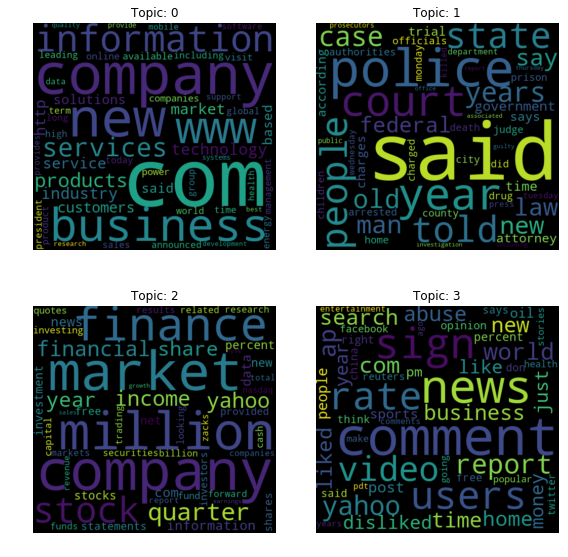

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()



In [22]:
# Exercise 5.5. Assign documents to topic
import numpy as np

# Generate topic assignment of each document
topic_assign=lda.transform(X_train)

print(topic_assign[0:5])

# set a probability threshold
# the threshold determines precision/recall
prob_threshold=0.25

topics=np.copy(topic_assign)
topics=np.where(topics>=prob_threshold, 1, 0)
print(topics[0:5])

# How to calulate precision and recall
# if your test data has been labeled

[[1.35783153e-01 8.53746146e-01 5.26876586e-03 5.20193554e-03]
 [1.25249031e-01 6.29449767e-04 8.73476159e-01 6.45359479e-04]
 [7.74204746e-04 9.77515705e-01 7.97528368e-04 2.09125615e-02]
 [2.76212003e-01 1.53240943e-03 2.91413761e-01 4.30841827e-01]
 [8.56763751e-01 1.59350300e-03 1.40062930e-01 1.57981597e-03]]
[[0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 1 1]
 [1 0 0 0]]


In [23]:
# Exercise 5.6. Evaluate topic models by perplexity of test data

perplexity=lda.perplexity(X_test)
print(perplexity)


2086.7877325682525


### 5.1. Find the number of topics ($K$)
- There are no "golden" rules to find K.
- Perplexity may be one way for you to find the number of topics
    - Typically, the best number of topics should be around the **lowest perplexity**
- However, in practice, a few factors need to be considered:
  - It is usually difficult for human to understand or visulaize a big number of topics
  - You may manually scan the data to figure out possible topics in the data, but these topics may not be correlated with the hidden structure discovered by LDA
  - Usually, after LDA, we need manually inspect each discovered topic, merge or trim topics to get semantically coherent but distinguishable topics

In [24]:
# Exercise 5.1.1 How to find the best number of topics?
# Vary variable num_topics, e.g. set it to 2, 3, 5, ...
# For each value, train LDA model, 
# calculate perplexity on the test data

import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,15):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=10,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)



2 2156.1722924591973
3 2095.5102632229537
4 2087.58664853511
5 2074.8114356542405
6 2071.2916045571023
7 2115.3135184913453
8 2162.3649539425614
9 2164.9889570881446
10 2213.6657212813193
11 2220.321111333512
12 2239.25157719226
13 2278.577194492858
14 2293.715161411709


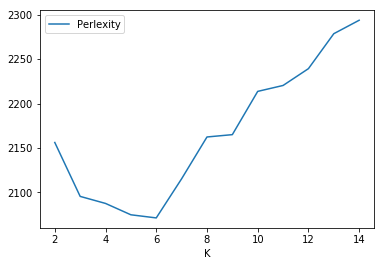

In [25]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

## 6. LDA Gensim Package

In [26]:
# 6.1. Create LDA model using the same TF matrix generated from sklearn

import gensim
from gensim import corpora

# A corpus is TF matrix in the list format, e.g.:
# [[(0, 1), (1,2), (4, 1), ...], [...], ...]
# which shows the first document has words with id=0,1,4
# and the count of word 0 is 1, word 1 is 2, ...

# convert the gensim corpus from the sparse tf matrix
corpus = gensim.matutils.Sparse2Corpus(X_train, documents_columns=False)

# create the mapping between id and words
id2word={idx:w for idx, w in enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=id2word)



In [27]:
# 6.2. Train LDA model

NUM_TOPICS = 4

# for detailed parameters, check
#https://radimrehurek.com/gensim/models/ldamodel.html

ldamodel = gensim.models.ldamodel.LdaModel(corpus, alpha='auto', num_topics = NUM_TOPICS, \
                                           id2word=id2word, iterations=15)

topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.008*"said" + 0.008*"com" + 0.007*"new" + 0.006*"company" + 0.006*"information" + 0.006*"business" + 0.004*"financial" + 0.004*"services" + 0.004*"year" + 0.004*"www" + 0.003*"market" + 0.003*"income" + 0.003*"industry" + 0.003*"million" + 0.003*"service" + 0.003*"online" + 0.003*"based" + 0.003*"http" + 0.002*"investment" + 0.002*"companies"')
(1, '0.011*"said" + 0.007*"comment" + 0.007*"com" + 0.006*"new" + 0.006*"news" + 0.005*"time" + 0.005*"year" + 0.005*"yahoo" + 0.005*"police" + 0.004*"company" + 0.004*"information" + 0.004*"sign" + 0.004*"report" + 0.003*"home" + 0.003*"users" + 0.003*"market" + 0.003*"ap" + 0.003*"www" + 0.003*"rate" + 0.003*"business"')
(2, '0.017*"said" + 0.006*"company" + 0.006*"year" + 0.005*"new" + 0.005*"market" + 0.005*"percent" + 0.004*"million" + 0.004*"news" + 0.003*"business" + 0.003*"com" + 0.003*"information" + 0.003*"police" + 0.003*"years" + 0.003*"quarter" + 0.003*"time" + 0.003*"including" + 0.003*"people" + 0.003*"data" + 0.002*"www" + 

In [30]:
# 6.3. visualize topics

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
#pyLDAvis.display(lda_display)

In [29]:
# 6.4. Test unseen documents

test_corpus = gensim.matutils.Sparse2Corpus(X_test, documents_columns=False)
predict = ldamodel.get_document_topics(test_corpus)
list(predict)[0:5]

[[(0, 0.19551283), (1, 0.22836311), (2, 0.062560156), (3, 0.5135639)],
 [(0, 0.03547712), (1, 0.8617756), (2, 0.08785622), (3, 0.014891135)],
 [(0, 0.4425305), (1, 0.09599636), (2, 0.33844104), (3, 0.123032115)],
 [(0, 0.49201575), (2, 0.3049721), (3, 0.19396669)],
 [(0, 0.8151823), (1, 0.035107512), (2, 0.06758211), (3, 0.082128)]]